# IRIS FLOWER CLASSIFICATION

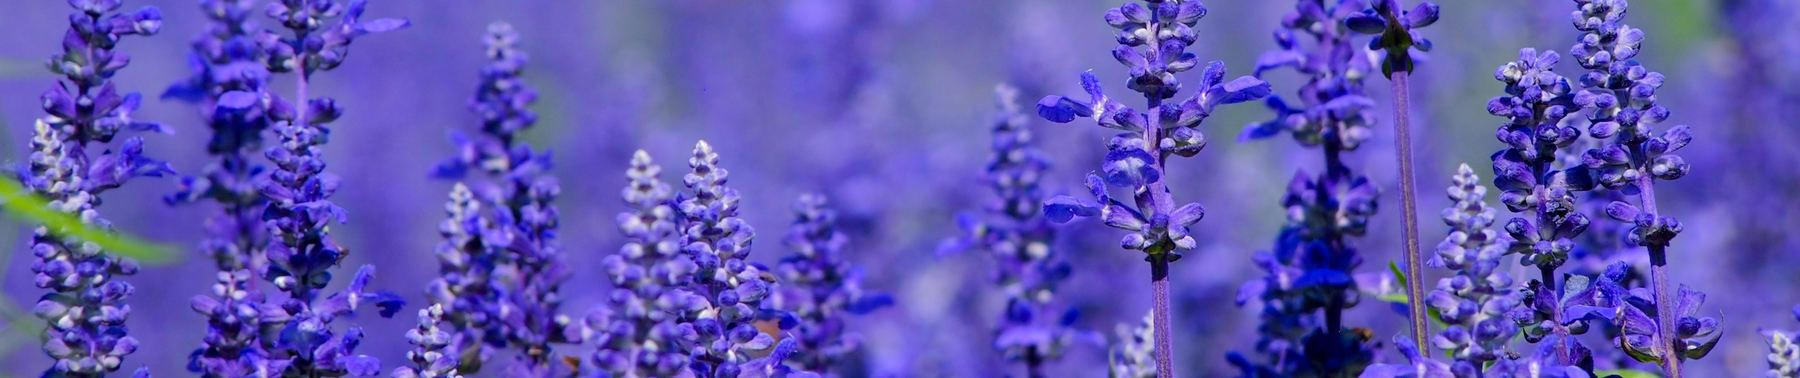

# Context
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

# Content
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

# Goal
The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

In [1]:
# importing basic packages
# Importing Basic Packages
import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data set
df = pd.read_csv('D:\IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

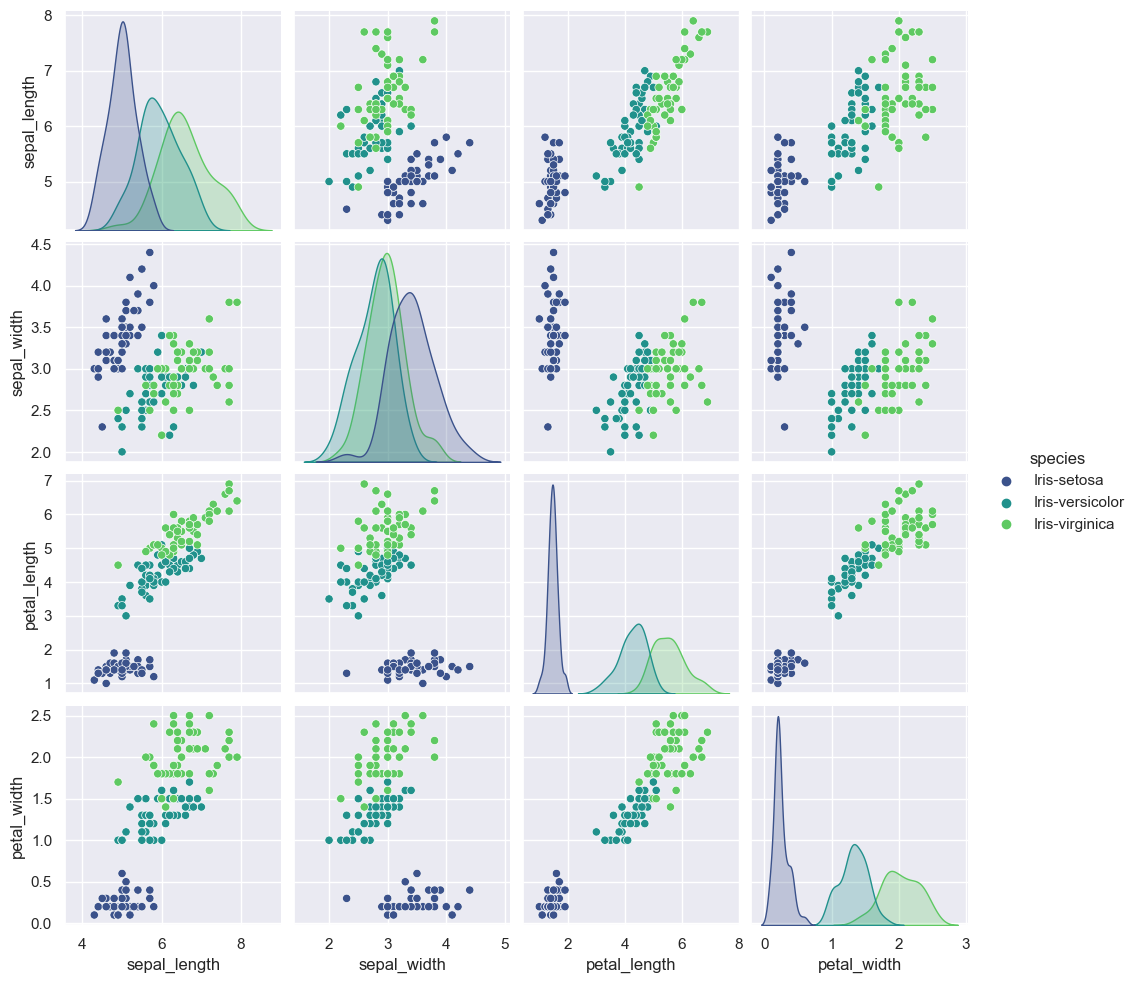

In [9]:
sns.pairplot(df, hue="species", palette="viridis")
plt.show()

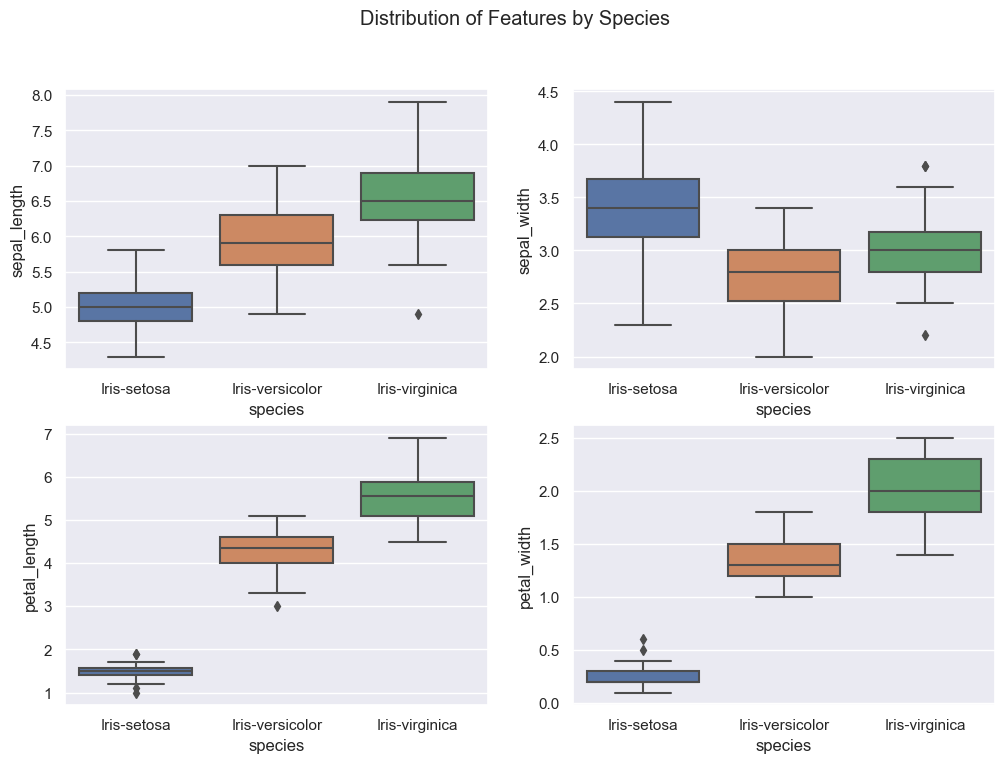

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=df)
plt.suptitle('Distribution of Features by Species')
plt.show()

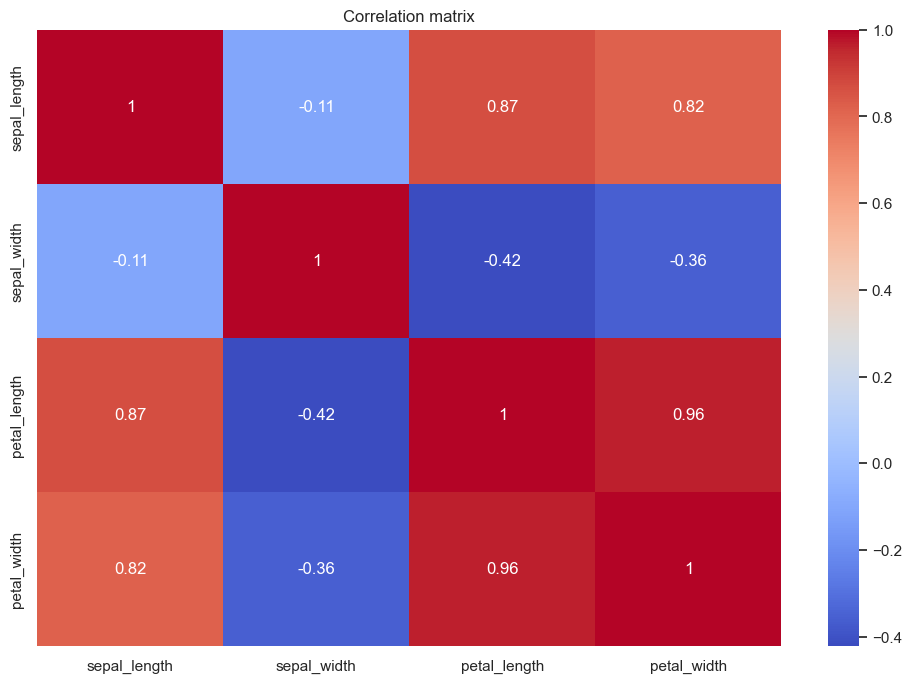

In [11]:
df1 = df.drop(['species'] , axis = 1)
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

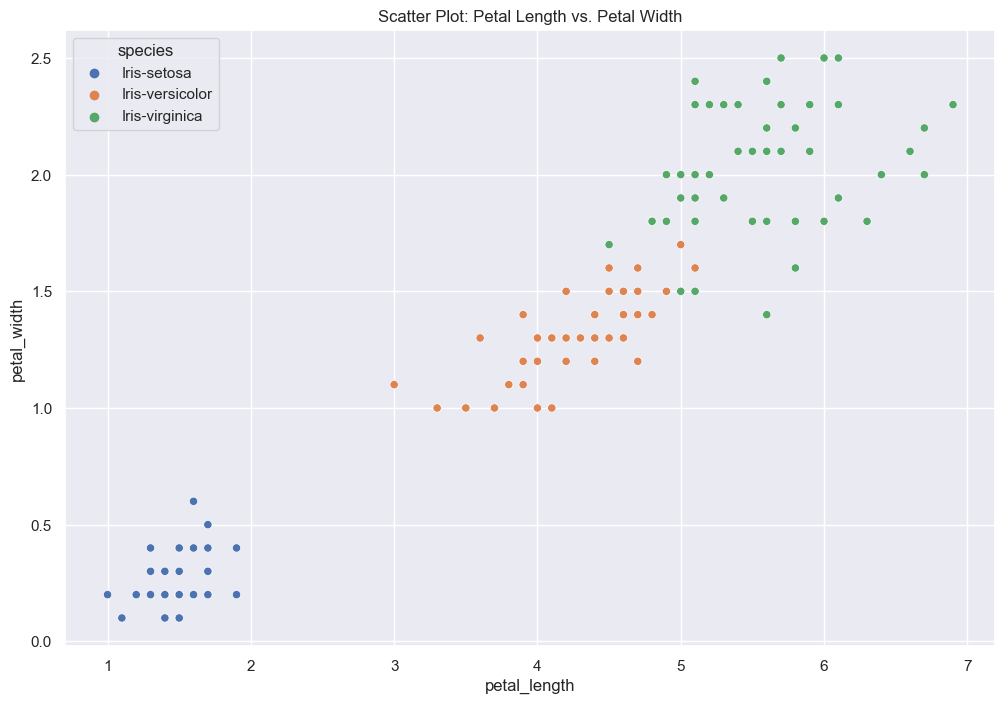

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title('Scatter Plot: Petal Length vs. Petal Width')
plt.show()

Text(0.5, 1.0, 'Distribution of Species in Iris Dataset')

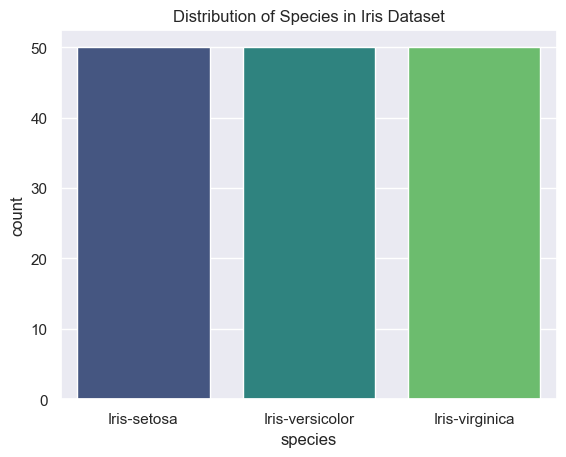

In [13]:
sns.countplot(x='species', data=df, palette='viridis')
plt.title('Distribution of Species in Iris Dataset')

In [14]:
#label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Species_encoded'] = labelencoder.fit_transform(df['species'])

In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [16]:
# Split the data into x and y for feature scaling
x= df.drop(['species','Species_encoded'],axis=1)
y= df[['Species_encoded']]

In [17]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

,Species_encoded
0,0
1,0
2,0
3,0
4,0


In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaled=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)

In [20]:
x_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [21]:
# Spliting the data for building the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=101)

# Building the model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)
    print('*************************************************************************')
    print('************************************************************************')
    print(f"\n{model.__class__.__name__} Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
    
    
    print('*************************************************************************')
    predictions = model.predict(x_train)
    accuracy1 = accuracy_score(y_train, predictions)
    classification_rep1 = classification_report(y_train, predictions)

    print(f"\n{model.__class__.__name__} Results:")
    print("Accuracy:", accuracy1)
    print("Classification Report:\n", classification_rep1)
    
    

*************************************************************************
************************************************************************

LogisticRegression Results:
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

*************************************************************************

LogisticRegression Results:
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.92      0.95        38
           2       0.93      0.98      0.95        42

    accuracy    

# Hyperparameter Tunning

In [29]:
logistic_params = {
    'penalty': 'l2',
    'C': 1.0
}

rf_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

svm_params = {
    'C': 1.0,
    'kernel': 'rbf',
    'gamma': 'scale'
}

knn_params = {'n_neighbors': 5,
    'weights': 'uniform',
    'p': 2 }

models = [
    LogisticRegression().set_params(**logistic_params),
    RandomForestClassifier().set_params(**rf_params),
    SVC().set_params(**svm_params),
    KNeighborsClassifier().set_params(**knn_params)  
]

for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)
    print('*************************************************************************')
    print('************************************************************************')
    print(f"\n{model.__class__.__name__} Results:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
    
    
    print('*************************************************************************')
    predictions = model.predict(x_train)
    accuracy1 = accuracy_score(y_train, predictions)
    classification_rep1 = classification_report(y_train, predictions)

    print(f"\n{model.__class__.__name__} Results:")
    print("Accuracy:", accuracy1)
    print("Classification Report:\n", classification_rep1)

*************************************************************************
************************************************************************

LogisticRegression Results:
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

*************************************************************************

LogisticRegression Results:
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.92      0.95        38
           2       0.93      0.98      0.95        42

    accuracy    